# Computer Vision - Laboratory

## Practicum 1: Basics on Image Processing and Manipulation

The main topics are:
1. Image loading, saving and creation
2. Color manipulation 

In order to complete this practicum, we will work with the following concepts: image creation, data types, image manipulation.

### Packages loading 

First we need to import the required Python packages for basic image manipulation. 

Run the following code:

In [1]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks

Note that commands starting with the percentage sign (`%`) are special internal commands to ipython (as opposed to Python code to be run). In the case below, we set the matplotlib environment to display images results inline (i.e. the images will be shown **inside the 
notebook**):

In [2]:
%matplotlib inline

### 1.1 Image creation

Remember that [Numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/) allows us to define images of different kinds treating them as matrices.

The most common examples are:

* Binary: with values of 0 or 1, interpreted as black or white, respectively.
* Grayscale: with possible data types uint8, uint16, double, whose pixel values define their intensity.
* RGB Image: color images consisting of 3 matrices (usually called 'channels'), which contain intensity values for each color separately R (red), G (green) and B (blue).


a) Create and display a grayscale image that has 150 rows and 200 columns where each value should be of type unsigned integer with 8 bits. 

In [3]:
#Your solution
img = np.zeros((150, 200), dtype=np.uint8)

How many values can each pixel have in this case? 

In [4]:
#Your solution
print("Des de 0 fins a 255 (el rang de valors que podem representar en 8 bits)")

Des de 0 fins a 255 (el rang de valors que podem representar en 8 bits)


b) Change the color of the pixels of the image in such a way that the left half is black (0) and the right half is white (255). 

Visualize the image and print the values of its first row.

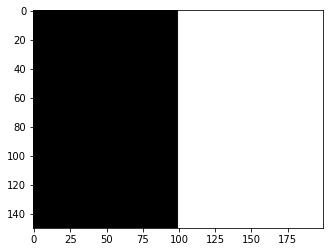

In [5]:
#Your solution
img[:, 100:] = 255 
plt.imshow(img, cmap='gray')

### 1.2 Image saving and loading

a) Use the IO image package to save the image previously created:

In [6]:
#Your solution
io.imsave('images/1_2.png', img)

b) Load the saved image and visualize it:

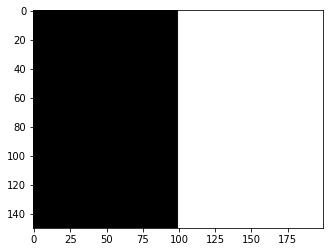

In [7]:
#Your solution
loaded = io.imread('images/1_2.png')
plt.imshow(loaded, cmap='gray')

### 1.3 Images manipulation and image masks

a) Load and show the image lenna.jpg, and check its dimensions. Add a black frame to Lenna's image. It should have a width of 1/10th of the height of the original image. We recommend to create a bigger black image to later embed the original image in the central part.

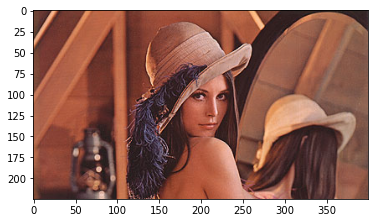

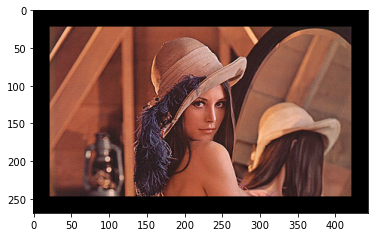

In [8]:
#Your solution

#Carreguem lenna.jpg
lenna = io.imread('images/lenna.jpg')
plt.imshow(lenna)
plt.show()

#Agafem les mides 
height, width, channels = lenna.shape
margin = int(0.1*height)

#Creem imatge negra afegint un 10% de l'amplada per cada banda
frame = np.zeros((height + 2*margin, width + 2*margin, channels), dtype = np.uint8)

#Omplim el centre de la imatge negra amb lenna
frame[margin:margin + height, margin:margin + width] = lenna


plt.imshow(frame)
plt.show()


b) Change the mask of the framed image to red. Visualize the three images with their respective titles.

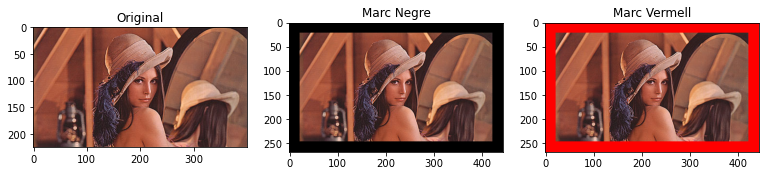

In [9]:
#Matriu 2D de mida frame amb tot 0
lenna_mask = np.zeros((height + 2*margin, width + 2*margin), dtype=bool)

# Posem a True tots els píxels on hi ha lenna
lenna_mask[margin:margin + height, margin:margin + width] = 1

red_frame = frame.copy()

#Posem tots els píxels on no hi ha lenna a vermell
red_frame[~lenna_mask] = [255,0,0]

#Si sapiguéssim que lenna no conté cap píxel totalment negre prdríem fer el següent:
#frame[(frame == 0).all(axis=2)] = [255,0,0]


fig, ax = plt.subplots(ncols=3, figsize=(13,13))
ax[0].imshow(lenna)
ax[0].set_title("Original")
ax[1].imshow(frame)
ax[1].set_title("Marc Negre")
ax[2].imshow(red_frame)
ax[2].set_title("Marc Vermell")

plt.show()

### 1.4 Color manipulation

a) Create and visualize the three images shown in the following figure:
<img src="./images_notebook/ex17a.png">

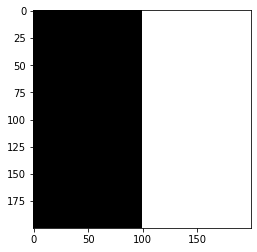

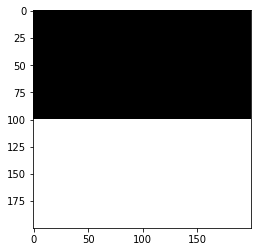

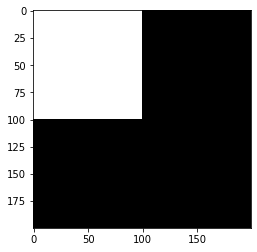

In [10]:
#Your solution
size = 200

img1 = np.zeros((size, size), dtype=np.uint8)

img1[:, size//2:] = 255 
plt.imshow(img1, cmap='gray')
plt.show()


img2 = np.zeros((size, size), dtype=np.uint8)
img2[size//2: , :] = 255
plt.imshow(img2, cmap='gray')
plt.show()

img3 = np.zeros((size, size), dtype=np.uint8)
img3[:size//2, :size//2] = 255
plt.imshow(img3, cmap='gray')
plt.show()

b) Using these three images, construct the following color image:
<img src='./images_notebook/ex17b.png'>

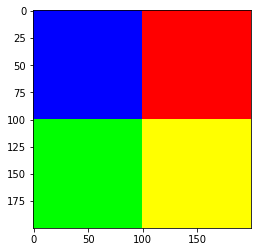

In [11]:
#Your solution
composite = np.zeros((size, size, 3), dtype=np.uint8)

composite[(img1 == 255)] = [255,0,0] #Pintem tota la franja esquerra de vermell
composite[(img2 == 255), 1] = 255 #Posem *només* la segona component dels elements de la franja inferior a 255. Els que eren negres passaran a ser verds i els que eren vermells seràn grocs [255,255,0] = groc
composite[(img3 == 255)] = [0,0,255] #Pintem el requadre superior esquerre de blau

plt.imshow(composite)

c) Read and visualize the image `sillas.jpg` (see figure top). Extract its three channels and visualize them in the same figure with their respective titles (see the figure bottom).
<img src="images_notebook/ex17c.png">

<img src="images_notebook/ex17c2.png">

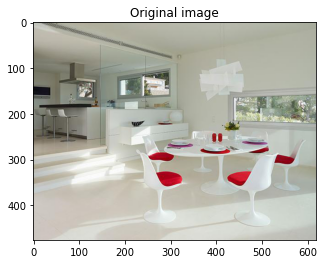

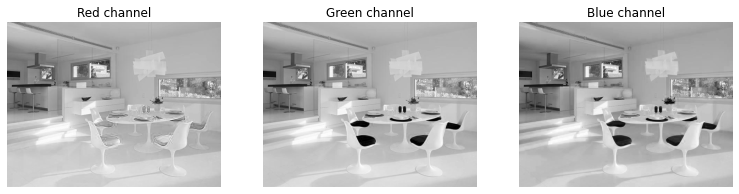

In [12]:
#Your solution
orig = plt.imread('images/sillas.jpg')
plt.imshow(orig)
plt.title("Original image")
plt.show()

fig, ax = plt.subplots(ncols=3, figsize=(13,13))

colors = ['Red', 'Green', 'Blue']

for i in range(3):
    channel = orig[..., i] #fer [..., i] amb els punts suspensius és el mateix que [:, :, i]. Agafem l'i-èssim canal
    ax[i].imshow(channel, cmap='gray')
    ax[i].axis('off')
    ax[i].set_title('%s channel' % colors[i])

plt.show()

### 1.5 Color image conversion

a) Load and show the image `lenna.jpg`, and check its dimensions.

**Note:** Pictures may appear in the figure with pseudocolors. Use (imread,im,cmap='rgb') to display them in RGB color and (imread,im,cmap='gray') to display them in grayscale. For more information, check the color maps available in the documentation.

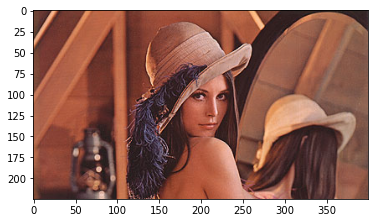

(225, 400, 3)


In [13]:
#Your solution
#Carreguem lenna.jpg
lenna = io.imread('images/lenna.jpg')
plt.imshow(lenna)
plt.show()

print(lenna.shape)

b) Convert the previous image to grayscale, visualize and save it. Moreover, show both images (RGB & greyscale) details such as shape, dtype, max and min values.

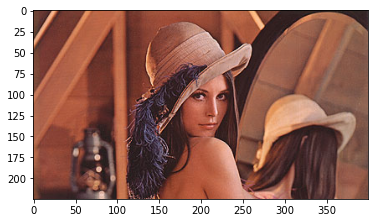

Type:  uint8  Min.value:  0  Max.value:  255  Image shape:  (225, 400, 3)


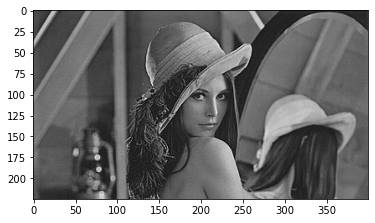

Type:  uint8  Min.value:  0  Max.value:  251  Image shape:  (225, 400)


In [14]:
#Your solution
from skimage.color import rgb2gray


def print_im_detail(image):
    print('Type: ', image.dtype, ' Min.value: ', image.min(), ' Max.value: ', image.max(), ' Image shape: ', image.shape)

#rgb2gray retorna una matriu de tipus float64, per passar-la a uint8 multipliquem tot per 255 i fem cast a uint8
gray_lenna =  np.uint8(rgb2gray(lenna)*255)
io.imsave('images/1_5.png', gray_lenna)

plt.imshow(lenna)
plt.show()
print_im_detail(lenna)

plt.imshow(gray_lenna, cmap='gray')
plt.show()
print_im_detail(gray_lenna)



c) Convert the lena image into a boolean image, by applying a binarization to the grayscale image. This should be done by setting to 0 all values equal or below 100 and to 1 otherwise. Check the range of the values of the image, and print the 10th row.

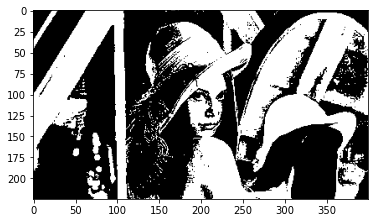

Type:  uint8  Min.value:  0  Max.value:  1  Image shape:  (225, 400)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [15]:
#Your solution
binarized_lenna = gray_lenna.copy()

#Màscara amb els valors menors o iguals a 100
mask = binarized_lenna <= 100

#Posem tots els que ho siguin a 0 i els que no a 1
binarized_lenna[mask] = 0 
binarized_lenna[~mask] = 1

plt.imshow(binarized_lenna, cmap='gray')
plt.show()

print_im_detail(binarized_lenna)

#Mostrem la desena fila (índex 9)
print(binarized_lenna[9])

d) Visualize in the same figure three images: (1) the original image, (2) the graylevel image, and (3) the binarized image. Set the corresponding titles of the images.

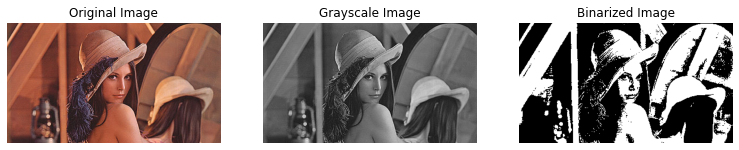

In [16]:
#Your solution
fig, ax = plt.subplots(ncols=3, figsize=(13,13))

ax[0].imshow(lenna)
ax[0].axis('off')
ax[0].set_title('Original Image')

ax[1].imshow(gray_lenna, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Grayscale Image')

ax[2].imshow(binarized_lenna, cmap='gray')
ax[2].axis('off')
ax[2].set_title('Binarized Image')

plt.show()

### 1.6 Contrast enhancement

a) Open the image `car_lowContrast.jpg` and visualize it without graylevel enhancement. To this purpose, check which are the minimal and maximal values and how to use the command imshow without contrast enhancement.

Note: When running the function `imshow()` the image is authomatically enhanced. Use the `vmin` and `vmax` parameters in order to deactivate the enhancement applied by default.

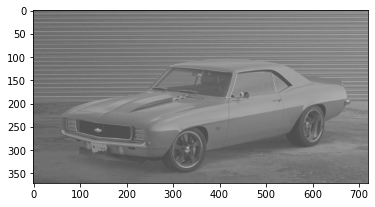

Type:  uint8  Min.value:  63  Max.value:  193  Image shape:  (371, 720)


In [17]:
#Your solution
image = io.imread('images/car_lowContrast.jpg')
plt.imshow(image, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

print_im_detail(image)

b) Create an image called `dark_image` using the  values from the original one, so that the minimal value of the new image is 0. Check the minimal and maximal values of the new image, and compare them with the previous one.

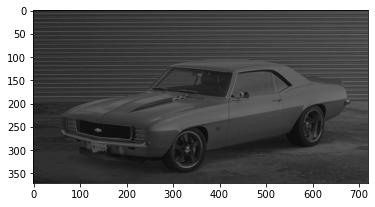

Type:  uint8  Min.value:  0  Max.value:  130  Image shape:  (371, 720)
El valor mínim és 0 i la diferència entre màxim i mínim és 130


In [18]:
#Your solution
#Desplaçem tots els valors cap a l'esquerra, fent que el mínim sigui 0. El màxim també es desplaçarà.
dark_image = image.copy() - image.min()

plt.imshow(dark_image, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

#Podem veure que tots els valors es redueixen 63 unitats respecte l'original
print_im_detail(dark_image)
print("El valor mínim és 0 i la diferència entre màxim i mínim és 130")

c) Create a new image called `bright_im` from the original one, so that the maximal value of the new image is 255. Check the minimal and maximal values of the new image, and compare them with the previous one.

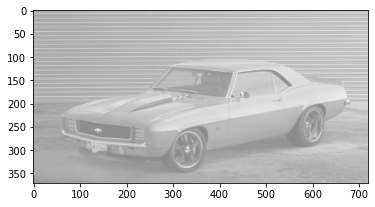

Type:  uint8  Min.value:  125  Max.value:  255  Image shape:  (371, 720)
El valor màxim és 255 i la diferència entre el màxim i el mínim continua essent de 130


In [19]:
#Your solution
#Desplaçem tots els valors cap a la dreta, fent que el màxim sigui 255. El mínim també es desplaçarà.
bright_im = image.copy() + (255-image.max())

plt.imshow(bright_im, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

print_im_detail(bright_im)
print("El valor màxim és 255 i la diferència entre el màxim i el mínim continua essent de 130")

d) Apply contrast enhancement to the original image. There are two ways for it: (1) by direct manipulation, and (2) through scikit-image command. Check the minimal and maximal values of the enhanced image, and compare them with the previous one. 

Implement the contrast enhancement using the two different available methods.

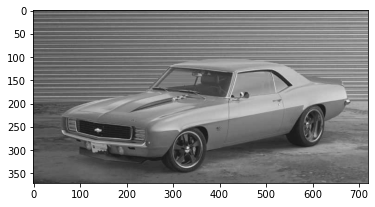

Type:  uint8  Min.value:  0  Max.value:  255  Image shape:  (371, 720)


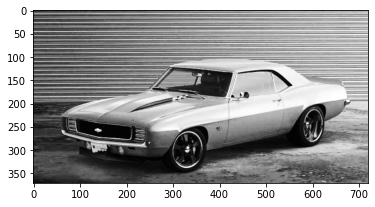

Type:  uint8  Min.value:  0  Max.value:  255  Image shape:  (371, 720)


In [20]:
#Your solution

#Direct manipulation (creem una nova imatge fent servir la fòrmula vista a classe)
enchanced1 = np.uint8((image.copy()-image.min())/(image.max()-image.min())*255)

plt.imshow(enchanced1, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

print_im_detail(enchanced1)


#Using skimage
from skimage import exposure

enchanced2 = np.uint8(exposure.equalize_hist(image)*255)

plt.imshow(enchanced2, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

print_im_detail(enchanced2)

e) Visualize the 5 images in the same figure, each one with its corresponding title.

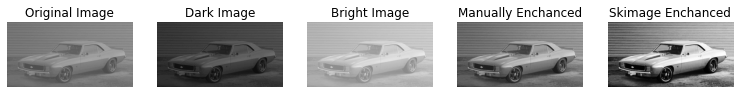

In [21]:
#Your solution
fig, ax = plt.subplots(ncols=5, figsize=(13,13))

titles = ['Original Image', 'Dark Image', 'Bright Image', 'Manually Enchanced', 'Skimage Enchanced']
images = [image, dark_image, bright_im, enchanced1, enchanced2]


for i in range(5):
    ax[i].imshow(images[i], cmap = 'gray', vmin = 0, vmax = 255)
    ax[i].axis('off')
    ax[i].set_title(titles[i])

plt.show()



### 1.7 Masks and logical image manipulation

a) Read the image `circles.bmp` (see figure top) and define 3 images in such a way that each one contains only 1 ball (see figure bottom). Visualize the 3 images in the same figure, each one with its corresponding title.

<img src="images_notebook/ex16.png">

**Note:** Be careful when applying `imshow` since it automatically increases the contrast of the image (putting minimum values to 0 and maximal to 1).

**Note:** Be careful when applying type conversion. Check the ranges of the image values.

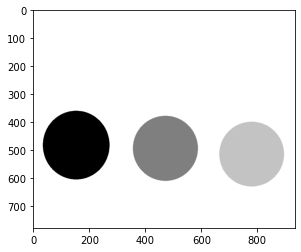

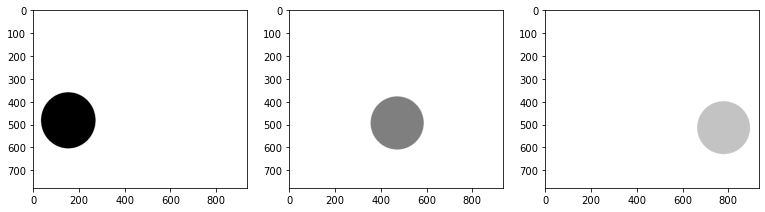

In [22]:
#Your solution

#Carreguem circles
circles = io.imread('images/circles.bmp')
plt.imshow(circles)
plt.show()

circles = rgb2gray(circles) #Retorna una matriu en float64, però ja ens va bé
colors = np.unique(circles) #Retorna una llista ordenada dels valors únics que hi ha. 

#Treiem l'1 (el color blanc en float64) en cas que hi sigui
if colors[-1] == 1:
    colors = colors[:-1]
    

fig, ax = plt.subplots(ncols=len(colors), figsize=(13,13))

images = []

for i in range(len(colors)): #Per a cada color únic
    images.append(circles.copy()) #Creem una còpia de cercles
    mask = (images[i] != colors[i]) #Busquem tots els punts que no són del color actual
    images[i][mask] = 1 # i els pintem de blanc
    
    ax[i].imshow(images[i], cmap = 'gray', vmin = 0, vmax = 1)
    
plt.show()

        


b) Given the images `coat.png` and `model.png` (first two images on the figure below), implement the necessary code to construct the image of the model with the coat (third image). Next find in internet an image with a texture and apply it to obtain an image of the jacket with the found texture (fourth image is only an example).

<img src="images_notebook/ex17d.png">

**Note:** when applying resize, rotate, etc. keep track how the image type and values range change. When necessary, apply type conversion using img_as_float, img_as_uint, img_as_ubyte.

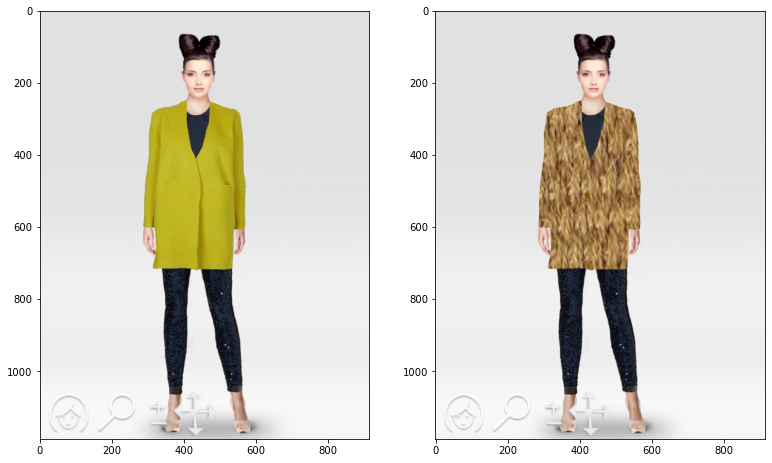

In [23]:
#Your solution
from skimage.transform import rescale, resize
from skimage.color import rgba2rgb
from skimage import img_as_ubyte



fig, ax = plt.subplots(ncols=2, figsize=(13,13))

coat = io.imread('images/coat.png')
model = io.imread('images/model.png')

coat = img_as_ubyte(rgba2rgb(coat))
model = img_as_ubyte(rgba2rgb(model))

assert (coat.shape == model.shape) #Ens assegurem que tenen la mateixa mida (en cas contrari hauríem de fer un resize com el que hi ha a sota)

coated_model = model.copy() #Fem una còpia de model on hi posarem l'abric

mask = (coat != 0) #Fem una màscara de tots els píxels de coat que no són negres (indica la posició de coat)
coated_model[mask] = coat[mask] #Substituim tots els pixels de model pels de coat on hi ha coat

ax[0].imshow(coated_model)


## Anem a posar-hi textura

texture = io.imread('images/texture.png')

#Si és rgba la passem a rgb
if texture.shape == (..., 4):
    texture = img_as_ubyte(rgba2rgb(texture))

#Si té una mida diferent la passem a la mida de model (resize passa tot a float64, hem de tornar-ho a uint8)
if texture.shape != model.shape:
    texture = img_as_ubyte(resize(texture, model.shape))

#Creem la còpia de model on posarem l'abric amb textura
coated_texture_model = model.copy()

#Hem fet resize de texture, podem seguir fent servir la mateixa màscara que abans!
coated_texture_model[mask] = texture[mask]

ax[1].imshow(coated_texture_model)

plt.show()
    



## Delivery

Compressed file **P1_Student1_Student2.zip** that includes:
- The notebook P1_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
- The images used that are not provided in P1.zip.

**Deadline (Campus Virtual): September 28, 11:00 p.m.** 